In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
#Import Statements
import os
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from numpy import array
import joblib
import sys

Using TensorFlow backend.


In [ ]:
#Change plot settings
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['font.size'] = 15
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2

In [ ]:
#Change the directory to the working directory for the project
os.chdir('/content/drive/My Drive/New LSTM Crack')

# Functions

In [ ]:
def read_file(file_name):
  file = file_name
  return pd.read_csv(file)

In [ ]:
def create_prediction_data(prediction_data):
  data_array = np.asarray(prediction_data)
  
  temp_data = data_array[:, 0]
  temp_series = (temp_data / np.amax(temp_data)).reshape(len(data_array), 1)

  stress_intensity = Scaler.transform(data_array[:, 1].reshape(len(data_array), 1))

  return np.hstack((temp_series, stress_intensity))

In [ ]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X = list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences)-1:
			break
		# gather input and output parts of the pattern
		seq_x = sequences[i:end_ix, :]
		X.append(seq_x)
	return array(X)

In [ ]:
def create_actual_data(file_name):
  file = pd.read_csv(file_name)
  data_array = np.asarray(file)
  crack_length = data_array[:, 1]
  return crack_length

In [ ]:
def create_da_dk_intermediate(case, stress_intensity, change):
  da = []
  dk = []
  
  for i in range(len(case) - change):
    da.append(case[i + change] - case[i])

  for i in range(len(stress_intensity) - change):
    dk.append(stress_intensity[i + change] - stress_intensity[i])

  return np.log(np.asarray(da)), np.log(np.asarray(dk))

In [ ]:
def create_da_dk_actual(filename, crack_length, change):
  file = pd.read_csv(filename)
  data_array = np.asarray(file)

  stress_intensity = data_array[:, 1].reshape(len(data_array), 1)
  stress_intensity = Scaler.transform(stress_intensity)

  da = []
  dk = []

  for i in range(len(crack_length) - change):
    da.append(crack_length[i + change] - crack_length[i])

  for i in range(len(stress_intensity) - change):
    dk.append(stress_intensity[i + change] - stress_intensity[i])

  return np.log(np.asarray(da)), np.log(np.asarray(dk))

# Loading Data

In [ ]:
#Load previously trained model
model = keras.models.load_model("./Weights/Model_NHT")
print("Model Loaded")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model Loaded


In [ ]:
data_1600 = read_file('./Predict/NonHeatTreated/1600N.csv')
data_1625 = read_file('./Predict/NonHeatTreated/1625N.csv')
data_1650 = read_file('./Predict/NonHeatTreated/1650N.csv')
data_1675 = read_file('./Predict/NonHeatTreated/1675N.csv')

data_1700 = read_file('./Predict/NonHeatTreated/1700N.csv')
data_1725 = read_file('./Predict/NonHeatTreated/1725N.csv')
data_1750 = read_file('./Predict/NonHeatTreated/1750N.csv')
data_1775 = read_file('./Predict/NonHeatTreated/1775N.csv')

data_1800 = read_file('./Predict/NonHeatTreated/1800N.csv')
data_1825 = read_file('./Predict/NonHeatTreated/1825N.csv')
data_1850 = read_file('./Predict/NonHeatTreated/1850N.csv')
data_1875 = read_file('./Predict/NonHeatTreated/1875N.csv')

data_1600_150 = read_file('./Predict/NonHeatTreated/1600N-150T.csv')
data_1700_150 = read_file('./Predict/NonHeatTreated/1700N-150T.csv')
data_1800_150 = read_file('./Predict/NonHeatTreated/1800N-150T.csv')

data_1600_250 = read_file('./Predict/NonHeatTreated/t100_1600N.csv')
data_1700_250 = read_file('./Predict/NonHeatTreated/t99_1700N.csv')
data_1800_250 = read_file('./Predict/NonHeatTreated/t101_1800N.csv')

data_1600_760 = read_file('./Predict/NonHeatTreated/1600N_760K.csv')
data_1700_760 = read_file('./Predict/NonHeatTreated/1700N_760K.csv')
data_1800_760 = read_file('./Predict/NonHeatTreated/1800N_760K.csv')

data_1600_600 = read_file('./Predict/NonHeatTreated/1600N_600K.csv')
data_1700_600 = read_file('./Predict/NonHeatTreated/1700N_600K.csv')
data_1800_600 = read_file('./Predict/NonHeatTreated/1800N_600K.csv')

data_1600_573 = read_file('./Predict/NonHeatTreated/1600N_573K.csv')
data_1700_573 = read_file('./Predict/NonHeatTreated/1700N_573K.csv')
data_1800_573 = read_file('./Predict/NonHeatTreated/1800N_573K.csv')

print('Data Loaded')

Data Loaded


In [ ]:
Scaler = joblib.load('./Weights/Scaler_NHT.save')

# Create Prediction Data

In [ ]:
pred_1600 = create_prediction_data(data_1600)
pred_1625 = create_prediction_data(data_1625)
pred_1650 = create_prediction_data(data_1650)
pred_1675 = create_prediction_data(data_1675)

pred_1700 = create_prediction_data(data_1700)
pred_1725 = create_prediction_data(data_1725)
pred_1750 = create_prediction_data(data_1750)
pred_1775 = create_prediction_data(data_1775)

pred_1800 = create_prediction_data(data_1800)
pred_1825 = create_prediction_data(data_1825)
pred_1850 = create_prediction_data(data_1850)
pred_1875 = create_prediction_data(data_1875)

pred_1600_150 = create_prediction_data(data_1600_150)
pred_1700_150 = create_prediction_data(data_1700_150)
pred_1800_150 = create_prediction_data(data_1800_150)

pred_1600_250 = create_prediction_data(data_1600_250)
pred_1700_250 = create_prediction_data(data_1700_250)
pred_1800_250 = create_prediction_data(data_1800_250)

pred_1600_760 = create_prediction_data(data_1600_760)
pred_1700_760 = create_prediction_data(data_1700_760)
pred_1800_760 = create_prediction_data(data_1800_760)

pred_1600_600 = create_prediction_data(data_1600_600)
pred_1700_600 = create_prediction_data(data_1700_600)
pred_1800_600 = create_prediction_data(data_1800_600)

pred_1600_573 = create_prediction_data(data_1600_573)
pred_1700_573 = create_prediction_data(data_1700_573)
pred_1800_573 = create_prediction_data(data_1800_573)

In [ ]:
n_steps = 7
split_1600 = split_sequences(pred_1600, n_steps)
split_1625 = split_sequences(pred_1625, n_steps)
split_1650 = split_sequences(pred_1650, n_steps)
split_1675 = split_sequences(pred_1675, n_steps)

split_1700 = split_sequences(pred_1700, n_steps)
split_1725 = split_sequences(pred_1725, n_steps)
split_1750 = split_sequences(pred_1750, n_steps)
split_1775 = split_sequences(pred_1750, n_steps)

split_1800 = split_sequences(pred_1800, n_steps)
split_1825 = split_sequences(pred_1825, n_steps)
split_1850 = split_sequences(pred_1850, n_steps)
split_1875 = split_sequences(pred_1875, n_steps)

split_1600_150 = split_sequences(pred_1600_150, n_steps)
split_1700_150 = split_sequences(pred_1700_150, n_steps)
split_1800_150 = split_sequences(pred_1800_150, n_steps)

split_1600_250 = split_sequences(pred_1600_250, n_steps)
split_1700_250 = split_sequences(pred_1700_250, n_steps)
split_1800_250 = split_sequences(pred_1800_250, n_steps)

split_1600_760 = split_sequences(pred_1600_760, n_steps)
split_1700_760 = split_sequences(pred_1700_760, n_steps)
split_1800_760 = split_sequences(pred_1800_760, n_steps)

split_1600_600 = split_sequences(pred_1600_600, n_steps)
split_1700_600 = split_sequences(pred_1700_600, n_steps)
split_1800_600 = split_sequences(pred_1800_600, n_steps)

split_1600_573 = split_sequences(pred_1600_573, n_steps)
split_1700_573 = split_sequences(pred_1700_573, n_steps)
split_1800_573 = split_sequences(pred_1800_573, n_steps)

# Predict On Data

In [ ]:
yhat1600 = model.predict(split_1600, verbose=1)
yhat1625 = model.predict(split_1625, verbose=1)
yhat1650 = model.predict(split_1650, verbose=1)
yhat1675 = model.predict(split_1675, verbose=1)
print('1600N FINISHED')

yhat1700 = model.predict(split_1700, verbose=1)
yhat1725 = model.predict(split_1725, verbose=1)
yhat1750 = model.predict(split_1750, verbose=1)
yhat1775 = model.predict(split_1775, verbose=1)
print('1700N FINISHED')

yhat1800 = model.predict(split_1800, verbose=1)
yhat1825 = model.predict(split_1825, verbose=1)
yhat1850 = model.predict(split_1850, verbose=1)
yhat1875 = model.predict(split_1875, verbose=1)
print('1800N FINISHED')

yhat1600_150 = model.predict(split_1600_150, verbose=1)
yhat1700_150 = model.predict(split_1700_150, verbose=1)
yhat1800_150 = model.predict(split_1800_150, verbose=1)
print('150K FINISHED')

yhat1600_250 = model.predict(split_1600_250, verbose=1)
yhat1700_250 = model.predict(split_1700_250, verbose=1)
yhat1800_250 = model.predict(split_1800_250, verbose=1)
print('250K FINISHED')

yhat1600_760 = model.predict(split_1600_760, verbose=1)
yhat1700_760 = model.predict(split_1700_760, verbose=1)
yhat1800_760 = model.predict(split_1800_760, verbose=1)
print('760K FINISHED')

yhat1600_600 = model.predict(split_1600_600, verbose=1)
yhat1700_600 = model.predict(split_1700_600, verbose=1)
yhat1800_600 = model.predict(split_1800_600, verbose=1)
print('600K FINISHED')

yhat1600_573 = model.predict(split_1600_573, verbose=1)
yhat1700_573 = model.predict(split_1700_573, verbose=1)
yhat1800_573 = model.predict(split_1800_573, verbose=1)
print('573K FINISHED')

68045/68045 [==============================] - 21s 315us/step
1600N FINISHED
68045/68045 [==============================] - 22s 316us/step
1700N FINISHED
68045/68045 [==============================] - 22s 316us/step
1800N FINISHED
68045/68045 [==============================] - 22s 317us/step
150K FINISHED
68045/68045 [==============================] - 21s 313us/step
250K FINISHED
68045/68045 [==============================] - 21s 314us/step
760K FINISHED
68045/68045 [==============================] - 21s 314us/step
600K FINISHED
68045/68045 [==============================] - 21s 314us/step
573K FINISHED


# Plotting With Actual Data

In [ ]:
cl1600 = create_actual_data('./Test/NonHeatTreated/1600N_t56.csv')
cl1700 = create_actual_data('./Test/NonHeatTreated/1700N_t35.csv')

cl1800 = create_actual_data('./Test/NonHeatTreated/1800N_t74.csv')
cl1875 = create_actual_data('./Test/NonHeatTreated/1875N.csv')

cl1600_150 = create_actual_data('./Test/NonHeatTreated/2-16-1600N-150T_training.csv')
cl1700_150 = create_actual_data('./Test/NonHeatTreated/2-16-1700N-150T_training.csv')
cl1800_150 = create_actual_data('./Test/NonHeatTreated/2-15-1800N-150T_training.csv')

cl1600_250 = create_actual_data('./Test/NonHeatTreated/t100_8-12-18_R05_1600N_training.csv')
cl1700_250 = create_actual_data('./Test/NonHeatTreated/t99_8-12-18_R05_1700N_training.csv')
cl1800_250 = create_actual_data('./Test/NonHeatTreated/t101_8-12-18_R05_1800N_training.csv')

cl1600_760 = create_actual_data('./Test/NonHeatTreated/1600N_760K.csv')
cl1700_760 = create_actual_data('./Test/NonHeatTreated/1700N_760K.csv')
cl1800_760 = create_actual_data('./Test/NonHeatTreated/1800N_760K.csv')

cl1600_600 = create_actual_data('./Test/NonHeatTreated/1600N_600K.csv')
cl1700_600 = create_actual_data('./Test/NonHeatTreated/1700N_600K.csv')
cl1800_600 = create_actual_data('./Test/NonHeatTreated/1800N_600K.csv')

cl1600_573 = create_actual_data('./Test/NonHeatTreated/1600N_573K.csv')
cl1700_573 = create_actual_data('./Test/NonHeatTreated/1700N_573K.csv')
cl1800_573 = create_actual_data('./Test/NonHeatTreated/1800N_573K.csv')

Plot against Original Data

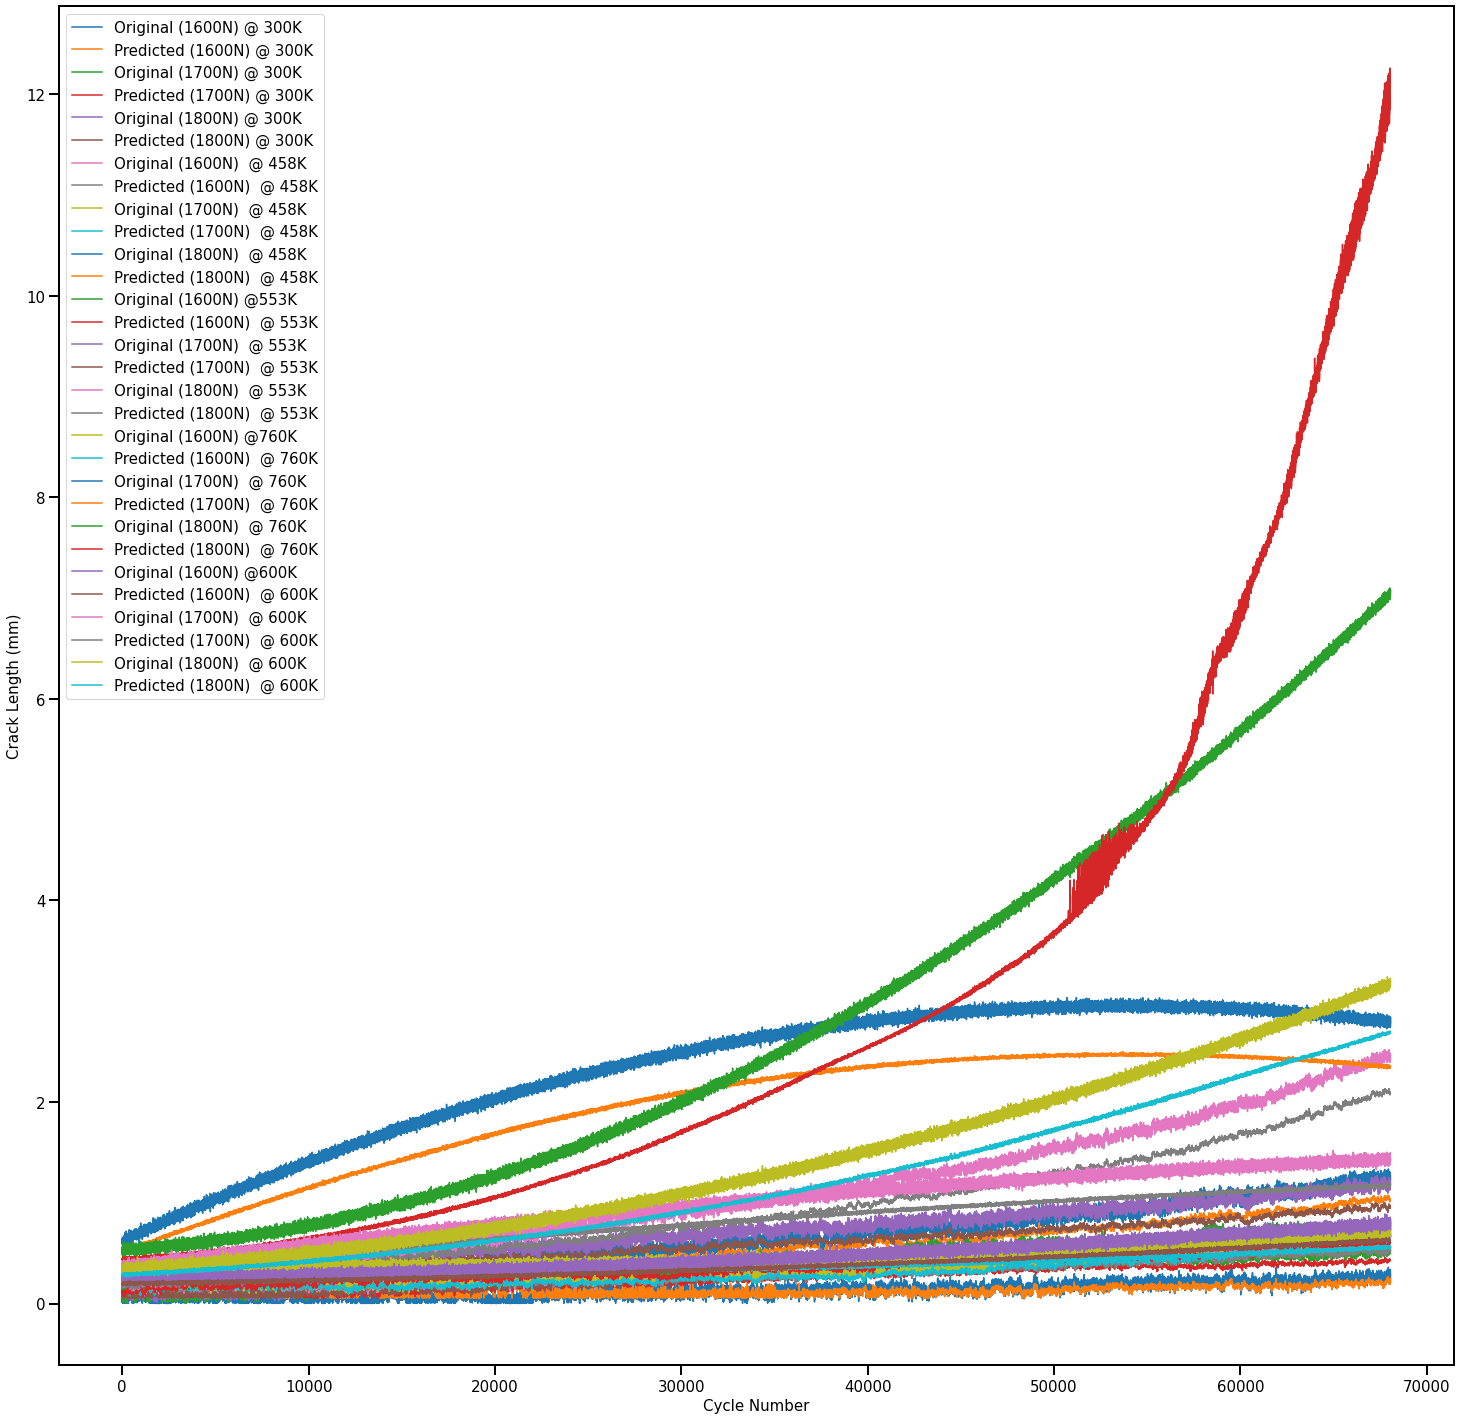

In [ ]:
plt.figure(figsize=(25, 25))
plt.plot(cl1600, label = 'Original (1600N) @ 300K')
plt.plot(yhat1600, label = 'Predicted (1600N) @ 300K')

plt.plot(cl1700, label = 'Original (1700N) @ 300K')
plt.plot(yhat1700, label = 'Predicted (1700N) @ 300K')

plt.plot(cl1800, label = 'Original (1800N) @ 300K')
plt.plot(yhat1800, label = 'Predicted (1800N) @ 300K')

plt.plot(cl1600_150, label = 'Original (1600N)  @ 458K')
plt.plot(yhat1600_150, label = 'Predicted (1600N)  @ 458K')

plt.plot(cl1700_150, label = 'Original (1700N)  @ 458K')
plt.plot(yhat1700_150, label = 'Predicted (1700N)  @ 458K')

plt.plot(cl1800_150, label = 'Original (1800N)  @ 458K')
plt.plot(yhat1800_150, label = 'Predicted (1800N)  @ 458K')

plt.plot(cl1600_250, label = 'Original (1600N) @553K')
plt.plot(yhat1600_250, label = 'Predicted (1600N)  @ 553K')

plt.plot(cl1700_250, label = 'Original (1700N)  @ 553K')
plt.plot(yhat1700_250, label = 'Predicted (1700N)  @ 553K')

plt.plot(cl1800_250, label = 'Original (1800N)  @ 553K')
plt.plot(yhat1800_250, label = 'Predicted (1800N)  @ 553K')

plt.plot(cl1600_760, label = 'Original (1600N) @760K')
plt.plot(yhat1600_760, label = 'Predicted (1600N)  @ 760K')

plt.plot(cl1700_760, label = 'Original (1700N)  @ 760K')
plt.plot(yhat1700_760, label = 'Predicted (1700N)  @ 760K')

plt.plot(cl1800_760, label = 'Original (1800N)  @ 760K')
plt.plot(yhat1800_760, label = 'Predicted (1800N)  @ 760K')

#####################
plt.plot(cl1600_600, label = 'Original (1600N) @600K')
plt.plot(yhat1600_600, label = 'Predicted (1600N)  @ 600K')

plt.plot(cl1700_600, label = 'Original (1700N)  @ 600K')
plt.plot(yhat1700_600, label = 'Predicted (1700N)  @ 600K')

plt.plot(cl1800_600, label = 'Original (1800N)  @ 600K')
plt.plot(yhat1800_600, label = 'Predicted (1800N)  @ 600K')


plt.xlabel("Cycle Number")
plt.ylabel("Crack Length (mm)")
plt.legend()

Paper Figure

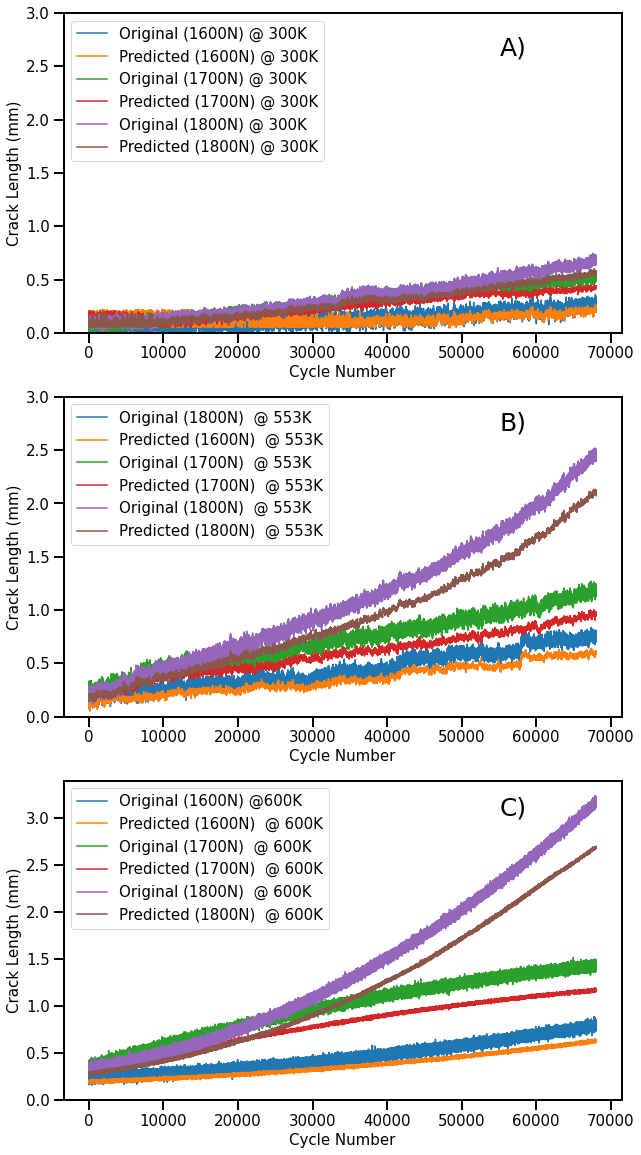

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10,20))

#300K Data
ax1.plot(cl1600, label = 'Original (1600N) @ 300K')
ax1.plot(yhat1600, label = 'Predicted (1600N) @ 300K')
ax1.plot(cl1700, label = 'Original (1700N) @ 300K')
ax1.plot(yhat1700, label = 'Predicted (1700N) @ 300K')
ax1.plot(cl1800, label = 'Original (1800N) @ 300K')
ax1.plot(yhat1800, label = 'Predicted (1800N) @ 300K')
ax1.set_xlabel("Cycle Number")
ax1.set_ylabel("Crack Length (mm)")
ax1.set_ylim([0, 3])
ax1.legend(loc=2)
ax1.annotate('A)',xy=(500, 1100), xycoords='figure points', fontsize=25, color='Black')


#553K Data
ax2.plot(cl1600_250, label = 'Original (1800N)  @ 553K')
ax2.plot(yhat1600_250, label = 'Predicted (1600N)  @ 553K')
ax2.plot(cl1700_250, label = 'Original (1700N)  @ 553K')
ax2.plot(yhat1700_250, label = 'Predicted (1700N)  @ 553K')
ax2.plot(cl1800_250, label = 'Original (1800N)  @ 553K')
ax2.plot(yhat1800_250, label = 'Predicted (1800N)  @ 553K')
ax2.set_xlabel("Cycle Number")
ax2.set_ylabel("Crack Length (mm)")
ax2.legend()
ax2.set_ylim([0, 3])
ax2.annotate('B)',xy=(500, 725), xycoords='figure points', fontsize=25, color='Black')


#573K Data
ax3.plot(cl1600_600, label = 'Original (1600N) @600K')
ax3.plot(yhat1600_600, label = 'Predicted (1600N)  @ 600K')
ax3.plot(cl1700_600, label = 'Original (1700N)  @ 600K')
ax3.plot(yhat1700_600, label = 'Predicted (1700N)  @ 600K')
ax3.plot(cl1800_600, label = 'Original (1800N)  @ 600K')
ax3.plot(yhat1800_600, label = 'Predicted (1800N)  @ 600K')
ax3.set_xlabel('Cycle Number')
ax3.set_ylabel('Crack Length (mm)')
ax3.legend()
ax3.set_ylim([0, 3.4])
ax3.annotate('C)',xy=(500, 340), xycoords='figure points', fontsize=25, color='Black')

plt.savefig('./Paper Images/CrackLength.pdf', format='pdf',bbox_inches='tight')

Heatmap

In [ ]:
force_heatmap_300 = np.hstack((np.repeat(1600,len(yhat1600)).reshape(len(yhat1600),1),np.repeat(1625,len(yhat1600)).reshape(len(yhat1600),1),
                           np.repeat(1650,len(yhat1600)).reshape(len(yhat1600),1), np.repeat(1675,len(yhat1600)).reshape(len(yhat1600),1),
                           np.repeat(1700,len(yhat1600)).reshape(len(yhat1600),1),np.repeat(1725,len(yhat1600)).reshape(len(yhat1600),1),
                           np.repeat(1750,len(yhat1600)).reshape(len(yhat1600),1),np.repeat(1775,len(yhat1600)).reshape(len(yhat1600),1),
                           np.repeat(1800,len(yhat1600)).reshape(len(yhat1600),1),np.repeat(1825,len(yhat1600)).reshape(len(yhat1600),1),
                           np.repeat(1850,len(yhat1600)).reshape(len(yhat1600),1),np.repeat(1875,len(yhat1600)).reshape(len(yhat1600),1)))

crack_heatmap_300 = np.hstack((yhat1600,yhat1625,yhat1650,yhat1675,yhat1700,yhat1725,yhat1750,yhat1775,yhat1800,yhat1825,yhat1850,yhat1875))

arr_ti = np.arange(0,68045).reshape(68045,1)

time_heatmap_300 = np.hstack((arr_ti,arr_ti,arr_ti,arr_ti,arr_ti,arr_ti,arr_ti,arr_ti,arr_ti,arr_ti,arr_ti,arr_ti))

In [ ]:
force_heatmap_573 = np.hstack((np.repeat(1600,len(yhat1600)).reshape(len(yhat1600),1),
                           np.repeat(1700,len(yhat1600)).reshape(len(yhat1600),1),
                           np.repeat(1800,len(yhat1600)).reshape(len(yhat1600),1)))
crack_heatmap_573 = np.hstack((yhat1600_573,yhat1700_573,yhat1800_573))
time_heatmap_573 = np.hstack((arr_ti,arr_ti,arr_ti))

In [ ]:
clev_300 = np.arange(crack_heatmap_300.min(),crack_heatmap_300.max())
clev_600 = np.arange(crack_heatmap_573.min(),crack_heatmap_573.max())

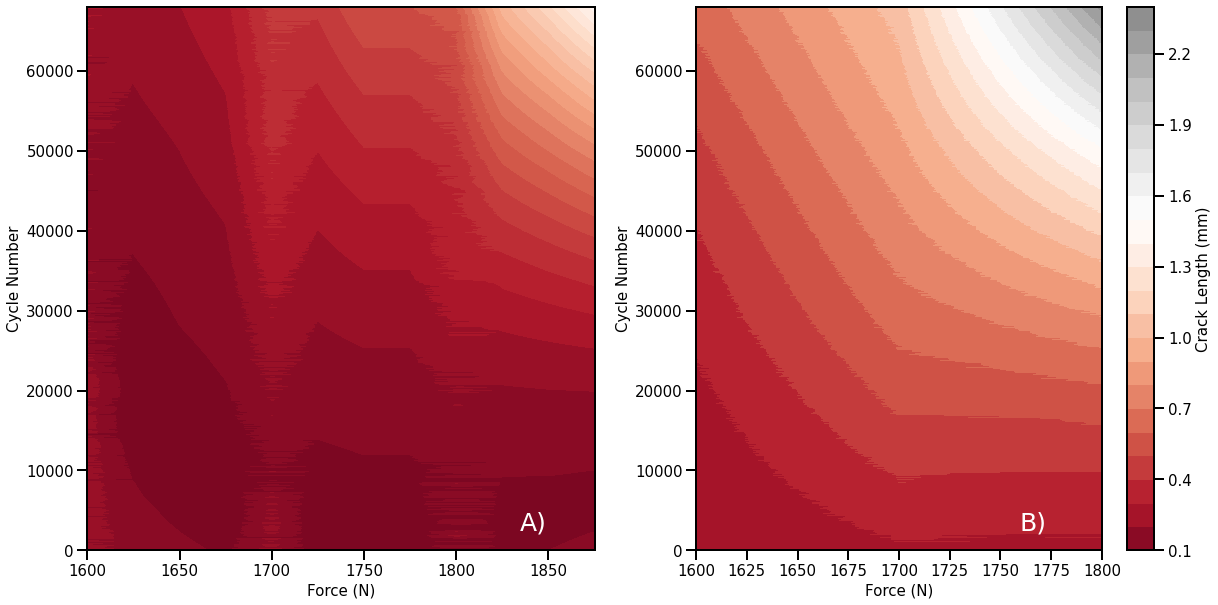

In [ ]:
opts = {'vmin': 0, 'vmax': 3, 'cmap': 'RdGy', 'levels':23}
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))

plot1 = ax1.contourf(force_heatmap_300,time_heatmap_300,crack_heatmap_300, **opts)
ax1.set_xlabel("Force (N)")
ax1.set_ylabel("Cycle Number")
ax1.annotate('A)',xy=(520, 75), xycoords='figure points', fontsize=25, color='white')

plot2 = ax2.contourf(force_heatmap_573,time_heatmap_573,crack_heatmap_573, **opts)
ax2.set_xlabel("Force (N)")
ax2.set_ylabel("Cycle Number")
ax2.annotate('B)',xy=(1020, 75), xycoords='figure points', fontsize=25, color='white')

cbar = fig.colorbar(plot2, ax=ax2)
cbar.set_label('Crack Length (mm)')

plt.savefig('./Paper Images/Heatmap.pdf', format='pdf',bbox_inches='tight')

DaDn

In [ ]:
change = 10000

da1600, dk1600 = create_da_dk_intermediate(yhat1600, pred_1600[:, 1], change)
da1700, dk1700 = create_da_dk_intermediate(yhat1700, pred_1700[:, 1], change)
da1800, dk1800 = create_da_dk_intermediate(yhat1800, pred_1800[:, 1], change)

da1600_250, dk1600_250 = create_da_dk_intermediate(yhat1600_250, pred_1600_250[:, 1], change)
da1700_250, dk1700_250 = create_da_dk_intermediate(yhat1700_250, pred_1700_250[:, 1], change)
da1800_250, dk1800_250 = create_da_dk_intermediate(yhat1800_250, pred_1800_250[:, 1], change)

da1600_573, dk1600_573 = create_da_dk_intermediate(yhat1600_573, pred_1600_573[:, 1], change)
da1700_573, dk1700_573 = create_da_dk_intermediate(yhat1700_573, pred_1700_573[:, 1], change)
da1800_573, dk1800_573 = create_da_dk_intermediate(yhat1800_573, pred_1800_573[:, 1], change)

da1675, dk1675 = create_da_dk_intermediate(yhat1675, pred_1675[:, 1], change)
da1775, dk1775 = create_da_dk_intermediate(yhat1775, pred_1775[:, 1], change)
da1875, dk1875 = create_da_dk_intermediate(yhat1875, pred_1875[:, 1], change)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
da1600_ts = da1600[0::1890]
da1700_ts = da1700[0::1890]
da1800_ts = da1800[0::1890]
dk1600_ts = dk1600[0::1890]
dk1700_ts = dk1700[0::1890]
dk1800_ts = dk1800[0::1890]

da1600_250_ts = da1600_250[0::1890]
da1700_250_ts = da1700_250[0::1890]
da1800_250_ts = da1800_250[0::1890]
dk1600_250_ts = dk1600_250[0::1890]
dk1700_250_ts = dk1700_250[0::1890]
dk1800_250_ts = dk1800_250[0::1890]

da1600_573_ts = da1600_573[0::1890]
da1700_573_ts = da1700_573[0::1890]
da1800_573_ts = da1800_573[0::1890]
dk1600_573_ts = dk1600_573[0::1890]
dk1700_573_ts = dk1700_573[0::1890]
dk1800_573_ts = dk1800_573[0::1890]

da1675_ts = da1675[0::1890]
da1775_ts = da1775[0::1890]
da1875_ts = da1875[0::1890]
dk1675_ts = dk1675[0::1890]
dk1775_ts = dk1775[0::1890]
dk1875_ts = dk1875[0::1890]


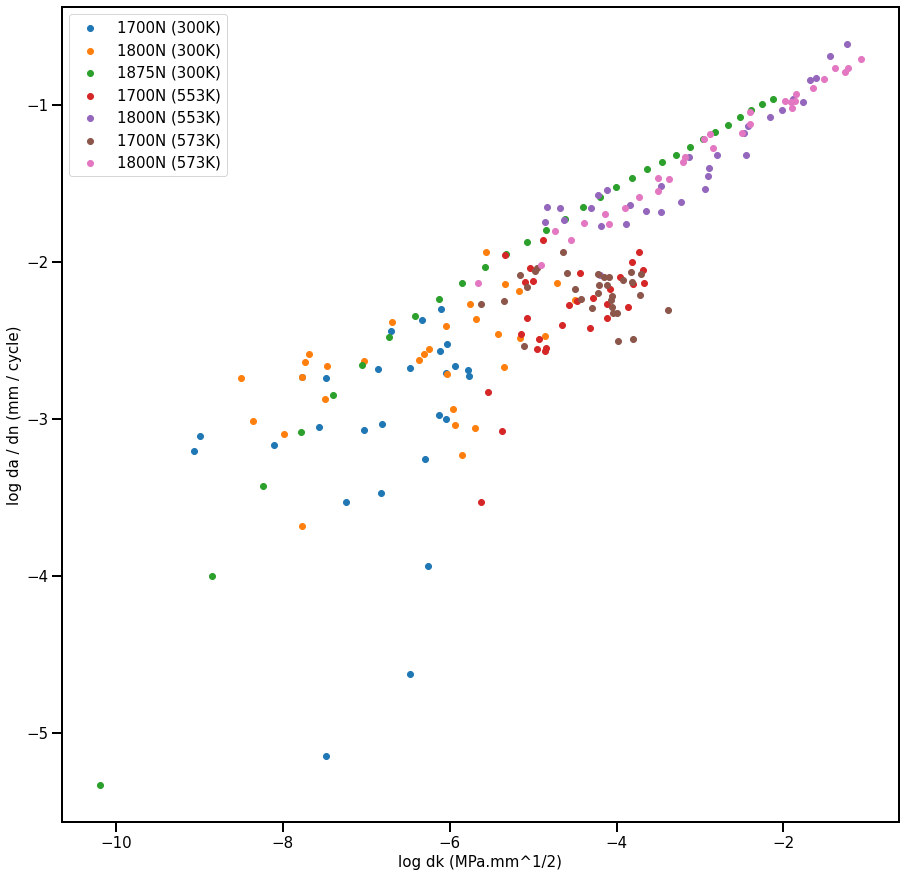

In [28]:
plt.figure(figsize=(15,15))
plt.scatter(dk1700_ts[:da1700_ts.shape[0]], da1700_ts, label = '1700N (300K)')
plt.scatter(dk1800_ts[:da1800_ts.shape[0]], da1800_ts, label = '1800N (300K)')

plt.scatter(dk1875_ts[:da1875_ts.shape[0]], da1875_ts, label = '1875N (300K)')

plt.scatter(dk1700_250_ts[:da1700_250_ts.shape[0]], da1700_250_ts, label = '1700N (553K)')
plt.scatter(dk1800_250_ts[:da1800_250_ts.shape[0]], da1800_250_ts, label = '1800N (553K)')

plt.scatter(dk1700_573_ts[:da1700_573_ts.shape[0]], da1700_573_ts, label = '1700N (573K)')
plt.scatter(dk1800_573_ts[:da1800_573_ts.shape[0]], da1800_573_ts, label = '1800N (573K)')

plt.xlabel('log dk (MPa.mm^1/2)')
plt.ylabel('log da / dn (mm / cycle)')
plt.legend()
plt.savefig('./Paper Images/dadn.pdf', format='pdf',bbox_inches='tight')